<a href="https://colab.research.google.com/github/chelseananda/BitcoinPrediction/blob/main/Examples/Bitcoin_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bitcoin**  

Bitcoin (₿) is a decentralized digital currency, without a central bank or single administrator, that can be sent from user to user on the peer-to-peer bitcoin network without the need for intermediaries. Transactions are verified by network nodes through cryptography and recorded in a public distributed ledger called a blockchain. The cryptocurrency was invented in 2008 by an unknown person or group of people using the name Satoshi Nakamoto.The currency began use in 2009 when its implementation was released as open-source software.(Source: Wikipedia)

The code is ispired from [here](https://www.kaggle.com/code/pralabhpoudel/bitcoin-eda-and-forcasting-using-pycaret) on this [dataset](https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data)

In [1]:
!pip install --pre pycaret -q 

     |████████████████████████████████| 487 kB 5.4 MB/s 
     |████████████████████████████████| 280 kB 29.9 MB/s 
     |████████████████████████████████| 1.4 MB 48.7 MB/s 
     |████████████████████████████████| 44 kB 891 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 72 kB 825 kB/s 
     |████████████████████████████████| 43 kB 1.5 MB/s 
     |████████████████████████████████| 141 kB 71.6 MB/s 
     |████████████████████████████████| 2.0 MB 47.7 MB/s 
     |████████████████████████████████| 79.9 MB 124 kB/s 
     |████████████████████████████████| 106 kB 59.1 MB/s 
     |████████████████████████████████| 3.3 MB 41.0 MB/s 
     |████████████████████████████████| 11.2 MB 48.2 MB/s 
     |████████████████████████████████| 7.0 MB 37.0 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 1.6 MB 45.6 MB/s 
     |██████

In [2]:
import pycaret
pycaret.__version__

'3.0.0.rc4'

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#Libraries for Data Manipulation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt #For datetime

#Libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


In [4]:
!wget https://huggingface.co/datasets/tofighi/bitcoin/resolve/main/bitcoin_2012_2021.zip -O bitcoin_2012_2021.zip 
!unzip bitcoin_2012_2021.zip && rm bitcoin_2012_2021.zip

--2022-11-16 20:40:42--  https://huggingface.co/datasets/tofighi/bitcoin/resolve/main/bitcoin_2012_2021.zip
Resolving huggingface.co (huggingface.co)... 34.200.207.32, 34.227.196.80, 2600:1f18:147f:e850:c00b:f3d9:24fb:fa94, ...
Connecting to huggingface.co (huggingface.co)|34.200.207.32|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/ca/7d/ca7d7a5981d3092bc4b28472c8bb9aa432550f819248f41f0626e507a04f330f/706d1035a40a470f6e6a1d59381054929bd8574b16e44342774f7f3ec6de0c2a?response-content-disposition=attachment%3B%20filename%3D%22bitcoin_2012_2021.zip%22&Expires=1668890442&Policy=eyJTdGF0ZW1lbnQiOlt7IlJlc291cmNlIjoiaHR0cHM6Ly9jZG4tbGZzLmh1Z2dpbmdmYWNlLmNvL3JlcG9zL2NhLzdkL2NhN2Q3YTU5ODFkMzA5MmJjNGIyODQ3MmM4YmI5YWE0MzI1NTBmODE5MjQ4ZjQxZjA2MjZlNTA3YTA0ZjMzMGYvNzA2ZDEwMzVhNDBhNDcwZjZlNmExZDU5MzgxMDU0OTI5YmQ4NTc0YjE2ZTQ0MzQyNzc0ZjdmM2VjNmRlMGMyYT9yZXNwb25zZS1jb250ZW50LWRpc3Bvc2l0aW9uPWF0dGFjaG1lbnQlM0IlMjBmaWxlbmFtZSUzRCUyMmJpdG

**Importing Dataset**

In [5]:
#Importing Dataset 
bitcoin=pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")
bitcoin.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1325318220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1325318280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1325318340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1325318400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1325318460,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Checking for Null Values**

In [6]:
#Checking columns with missing data
bitcoin.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [7]:
len(bitcoin)

4857377

**Dropping Null Values**

In [8]:
#Dropping Null Values and assest id as it is irrelevant
bitcoin=bitcoin.dropna()
#Cleaning NAN values for Close values
bitcoin = bitcoin[bitcoin['Close'].notna()]
bitcoin.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
1896,1325431680,4.84,4.84,4.84,4.84,10.000000,48.400000,4.840000
2333,1325457900,5.00,5.00,5.00,5.00,10.100000,50.500000,5.000000
3612,1325534640,5.00,5.00,5.00,5.00,19.048000,95.240000,5.000000
4553,1325591100,5.32,5.32,5.32,5.32,2.419173,12.870000,5.320000
4710,1325600520,5.14,5.14,5.14,5.14,0.680000,3.495200,5.140000


In [9]:
len(bitcoin)

3613769

**Changing Unix timestamp into Date and Time**

In [10]:
#Changing timestamp into date
bitcoin['Timestamp'] = pd.to_datetime(bitcoin['Timestamp'],unit='s')
bitcoin.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


# Explanatory Data Analysis

**Statistics of Bitcoin**

In [11]:
bitcoin.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3613769.0,6009.023680,8996.247351,3.8,443.860000,3596.970000,8627.270000,6.176356e+04
High,3613769.0,6013.357082,9003.521006,3.8,444.000000,3598.190000,8632.980000,6.178183e+04
Low,3613769.0,6004.488004,8988.778319,1.5,443.520000,3595.620000,8621.090000,6.167355e+04
Close,3613769.0,6009.013545,8996.359688,1.5,443.860000,3597.000000,8627.160000,6.178180e+04
Volume_(BTC),3613769.0,9.323249,30.549891,0.0,0.409776,1.979811,7.278216,5.853852e+03
Volume_(Currency),3613769.0,41762.842397,151824.783901,0.0,452.142195,3810.124143,25698.211176,1.390067e+07
Weighted_Price,3613769.0,6008.934800,8995.991643,3.8,443.830622,3596.804145,8627.636614,6.171621e+04


**Some Insights about Bitcoin**

In [12]:
print("All Time High Price:",max(bitcoin['High']))
print("Highest Number of Bitcoin units traded during the minute:",max(bitcoin['Volume_(BTC)']))

All Time High Price: 61781.83
Highest Number of Bitcoin units traded during the minute: 5853.8521659


**High as per Time**

In [13]:
!pip install matplotlib==3.1.3 -q

     |████████████████████████████████| 13.1 MB 2.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.0.0rc4 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.


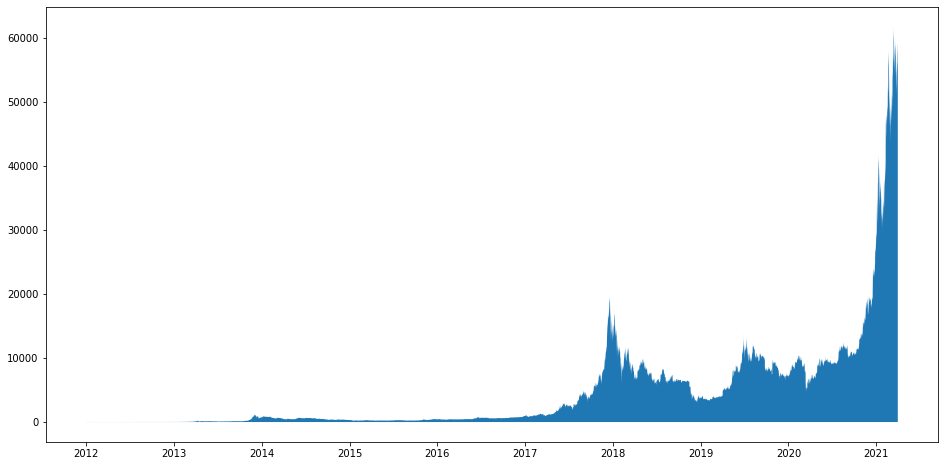

In [14]:
#Plotting High values of Bitcoin
plt.figure(figsize=(16,8))
plt.fill_between(bitcoin['Timestamp'], bitcoin['High'])
plt.show()

**Trading Volume_(BTC) as per Time**

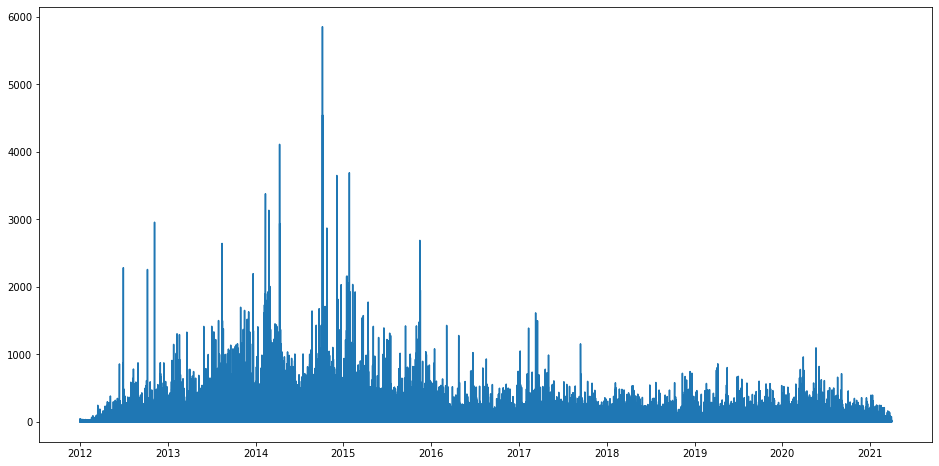

In [15]:
#Plotting Trading Volume of Bitcoin
plt.figure(figsize=(16,8))
plt.plot(bitcoin['Timestamp'], bitcoin['Volume_(BTC)'])

**Correlation**

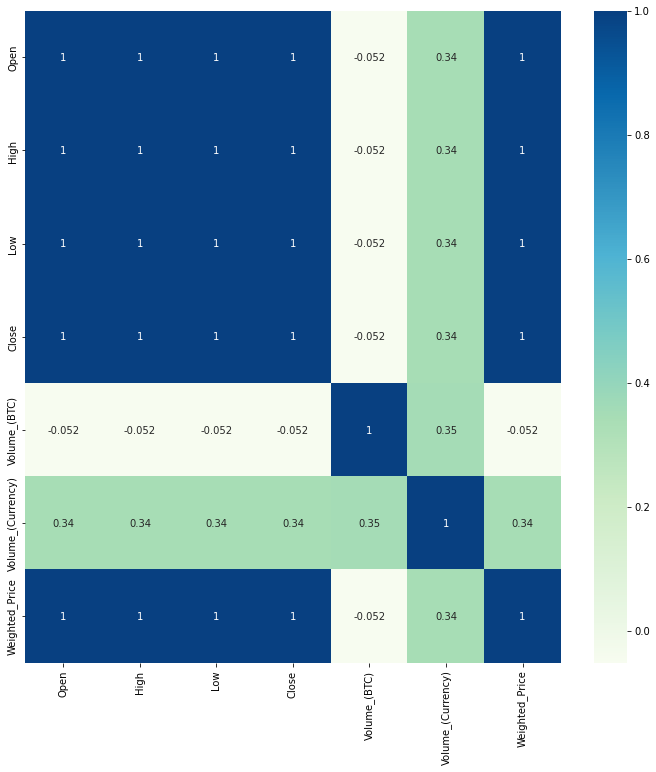

In [16]:
#Calculating Correlation
corr=bitcoin.corr()

#Plotting Correlation
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,cmap="GnBu")

# Using **PyCaret** for Forcasting Close price of Bitcoin

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that speeds up the experiment cycle exponentially and makes you more productive.

The time series module is still in beta. The development team is adding new functionalities every day and doing weekly pip releases. Please ensure to create a separate python environment to avoid dependency conflicts with the main pycaret. The final release of this module will be merged with the main pycaret in the next major release.

**[Website](https://pycaret.org/)** **[Github](https://github.com/pycaret/pycaret)** **[LinkedIn](https://www.linkedin.com/company/pycaret/)**

In [17]:
#creating new data for forcasting  with timestamp and closing price
close_price= bitcoin[['Timestamp', 'Close']].copy()
close_price=close_price.set_index('Timestamp')
close_price = close_price.groupby('Timestamp').sum()
close_price = close_price.asfreq(method='ffill',freq='D', normalize=True)
close_price.head()

,Close
Timestamp,
2011-12-31,4.39
2012-01-01,4.58
2012-01-02,5.00
2012-01-03,5.00
2012-01-04,4.93


In [18]:
len(close_price)

3378

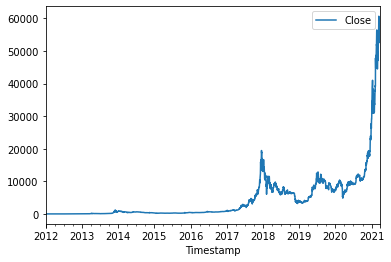

In [19]:
#Plotting the chart
close_price.plot()

In [20]:
from pycaret.internal.pycaret_experiment import TimeSeriesExperiment

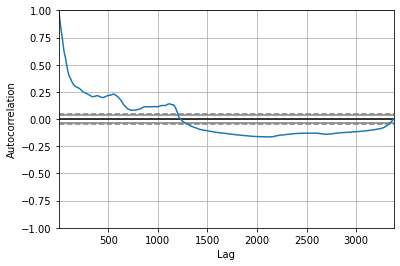

In [21]:
pd.plotting.autocorrelation_plot(close_price)